In [142]:
import os
import sys
from importlib import reload
sys.path.append('../')
sys.path.append('../datasets')
sys.path.append('../models')
from matplotlib import pyplot as plt

import torch
from models import base_networks as bn

import numpy as np

from source import yaml_utils as yu





In [134]:
reload(bn)


numseq=500
lenseq=10
model = bn.Radial_sine(scale=3.)

# checkX = torch.tensor(np.sin(np.linspace(0, 2* np.pi, numseq*lenseq)))
# checkY = torch.tensor(np.cos(np.linspace(0, 2* np.pi, numseq*lenseq)))
# checkZ = torch.zeros(checkX.shape)

# check_dat  = torch.stack([checkX, checkY, checkZ])
# check_dat  = torch.cat([check_dat, check_dat])
# check_dat = check_dat.permute([1,0])
# check_dat = check_dat.reshape(-1 , 60)



def create_latent_dat(numseq, lenseq=10, dim_s=6, zloc = 0):
    latent_dat = torch.zeros([numseq, lenseq, dim_s])
    for k in range(numseq):
        for j in range(lenseq):
            for m in range(2):
                speed = 2*np.random.normal()
                loc = np.random.normal() * 2* np.pi
                radius = np.cos(np.arcsin(zloc))
                latent_dat[k, j, 3* m + 0] = radius * np.sin(j*speed + loc)
                latent_dat[k, j, 3* m + 1] = radius * np.cos(j*speed + loc)
                latent_dat[k, j, 3* m + 2] = zloc 
    return latent_dat

latent_dat = create_latent_dat(numseq=numseq, zloc=0)


                
print(latent_dat.shape)


latent_input = latent_dat.reshape(-1, 60)
xdat = model(latent_input)
print(xdat.shape)
xdat = xdat.reshape([-1, lenseq, 6])
xdat.shape

torch.Size([500, 10, 6])
torch.Size([500, 60])


torch.Size([500, 10, 6])

In [135]:
latent_dat.shape


torch.Size([500, 10, 6])

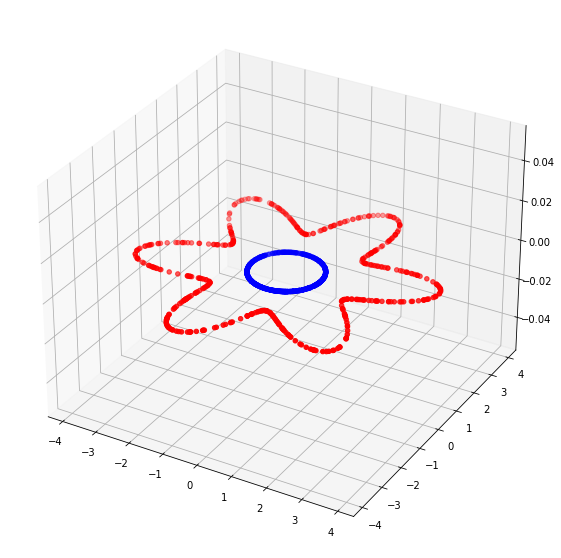

In [136]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')




#latent_dat = check_dat

myslice = 0
pos= 1

shift= 0

batch = latent_dat[:, myslice, pos*3:(pos+1)*3]
xbatch = xdat[:, myslice, pos*3:(pos+1)*3]



ax.scatter(batch[:, 0], batch[:, 1], batch[:, 2], color= 'blue')

ax.scatter(xbatch[:, 0], xbatch[:, 1], xbatch[:, 2], color= 'red')




In [137]:
latent_dats = []   
for val in np.linspace(-1+0.2, 1-0.2, 5):
    latent_d = create_latent_dat(numseq=numseq, zloc=val)
    latent_dats.append(latent_d)
    
latent_dat = torch.cat(latent_dats, axis=0)



latent_input = latent_dat.reshape([-1, 6])
xdat = model(latent_input)
xdat = xdat.reshape([-1, lenseq, 6])


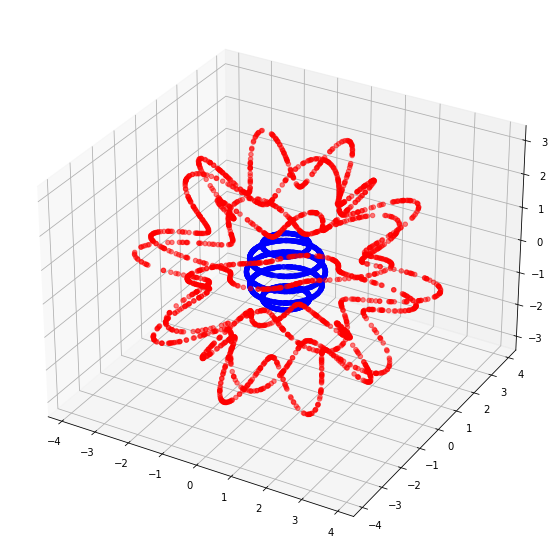

In [138]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')




#latent_dat = check_dat

myslice = 0
pos= 1

alp = 0.5
shift= 0

batch = latent_dat[:, myslice, pos*3:(pos+1)*3]
xbatch = xdat[:, myslice, pos*3:(pos+1)*3]


ax.scatter(batch[:, 0], batch[:, 1], batch[:, 2], color= 'blue',alpha=alp)

ax.scatter(xbatch[:, 0], xbatch[:, 1], xbatch[:, 2], color= 'red', alpha=alp)





In [249]:
dataconfig = {'args': {'T': 8,
  'data_filename': 'so3dat_sphere_sinetwo.pt',
  'datamode': 'so3',
  'pmatnet': None,
  'train': True},
 'fn': './datasets/so3_data.py',
 'name': 'SO3rotationSequence'}

In [250]:
data  = yu.load_component(dataconfig)

In [251]:
datcheck = data.data.reshape([-1, 15, 10, 6])

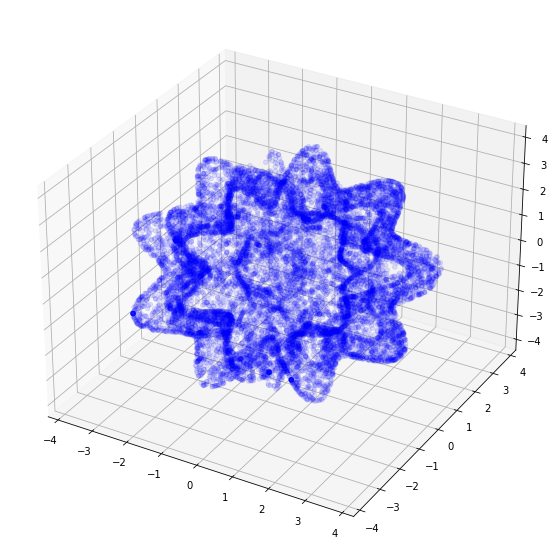

In [252]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

alp = 0.1
numseq = 1000
for k in range(numseq):

    x = datcheck[k, :, myslice, 0] 
    y = datcheck[k, :, myslice, 1] 
    z = datcheck[k, :, myslice, 2]

    ax.scatter(x, y, z, color= 'blue',alpha=alp)



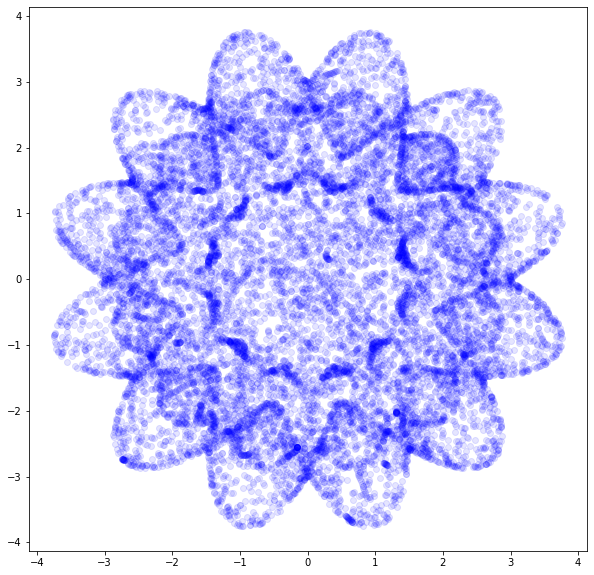

In [253]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

alp = 0.1
numseq = 1000
for k in range(numseq):

    x = datcheck[k, :, myslice, 0] 
    y = datcheck[k, :, myslice, 1] 

    ax.scatter(x, y,color= 'blue',alpha=alp)

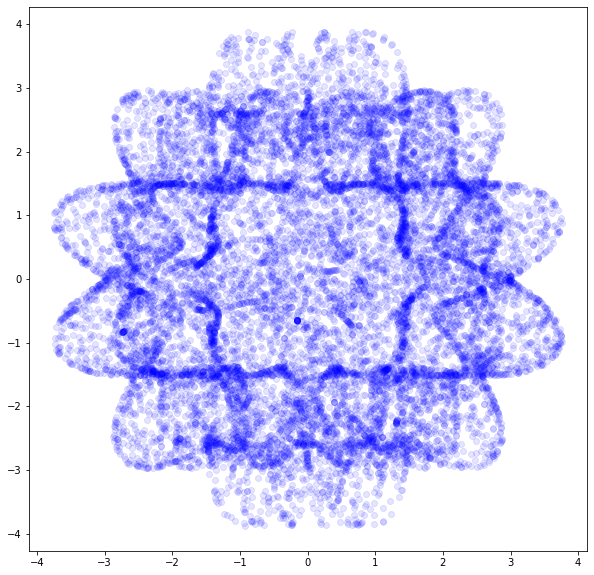

In [254]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

alp = 0.1
numseq = 1000
for k in range(numseq):

    x = datcheck[k, :, myslice, 0] 
    y = datcheck[k, :, myslice, 1] 
    z = datcheck[k, :, myslice, 2] 



    ax.scatter(x, z,color= 'blue',alpha=alp)